## Imports

In [2]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

Изначальное изображение в оттенках серого

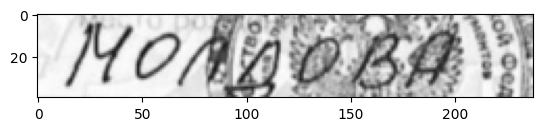

In [149]:
default_img = cv2.imread('/kaggle/input/cyrillic-handwriting-dataset/train/aa1.png', 0)
default_img = cv2.cvtColor(default_img, cv2.COLOR_GRAY2BGR)
plt.imshow(default_img)

Процесс предобработки изображения

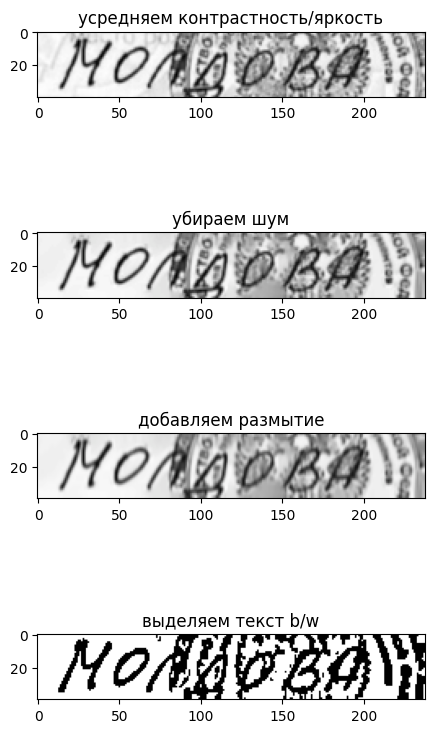

In [150]:
fig = plt.figure(figsize=(5, 10))
rows = 4
columns = 1

img = cv2.normalize(default_img, default_img, 0, 255, cv2.NORM_MINMAX)
fig.add_subplot(rows, columns, 1)
plt.title('усредняем контрастность/яркость')
plt.imshow(img)

#img = cv2.fastNlMeansDenoisingColored(img, img, 17, 17, 7, 10)
img = cv2.fastNlMeansDenoisingColored(img, img, 10, 10, 7, 15)
fig.add_subplot(rows, columns, 2)
plt.title('убираем шум')
plt.imshow(img)

img = cv2.GaussianBlur(img, (1, 3), 0)
fig.add_subplot(rows, columns, 3)
plt.title('добавляем размытие')
plt.imshow(img)

res = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#res = cv2.threshold(res, 0, 255, cv2.THRESH_TOZERO | cv2.THRESH_OTSU) [1]
res = cv2.adaptiveThreshold(res, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 4)
res = cv2.cvtColor(res, cv2.COLOR_GRAY2BGR)
fig.add_subplot(rows, columns, 4)
plt.title('выделяем текст b/w')
plt.imshow(res)